In [1]:
import numpy as np
import pandas as pd
import difflib
#similar to string matching
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
#term-frequency inverse document frequency
# TfidfVectorizer - This is used to convert text data into numerical values
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [ ]:
#stashing technology

In [ ]:
## Trying out branch , this is brnach 2

In [ ]:
# this is a new branch named as 1.

### Loading the Kaggle Dataset

In [2]:

movies_data =pd.read_csv('movies.csv')
movies_data.head()


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


## EDA

It is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.This allows you to get a better feel of your data and find useful patterns in it.                         



 

In [3]:
display (movies_data.shape)

(4803, 24)

In [4]:
selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)


['genres', 'keywords', 'tagline', 'cast', 'director']


In [5]:
display (movies_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

None

In [6]:
movies_data.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


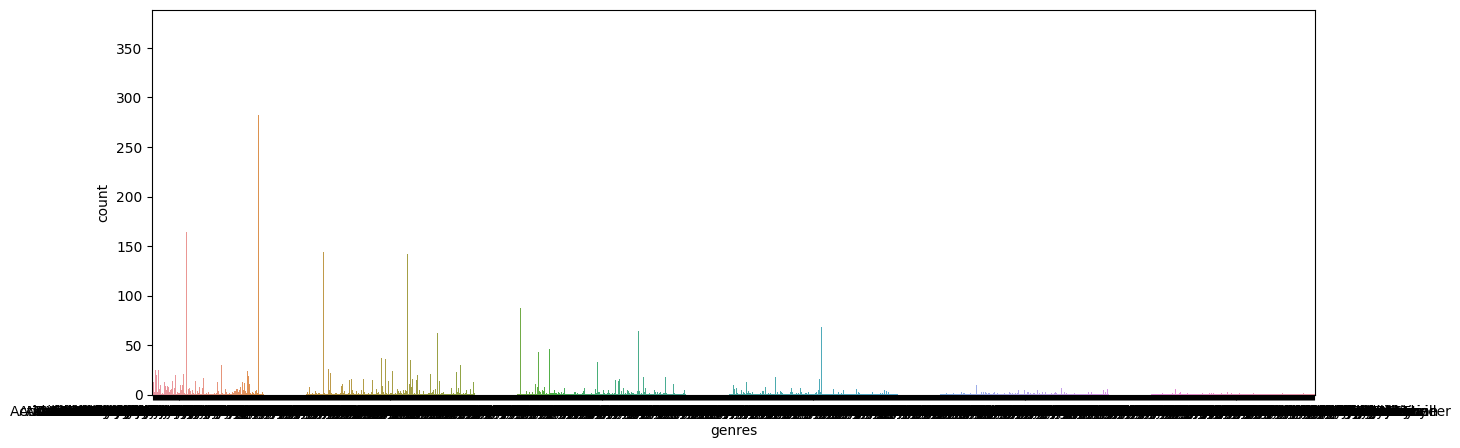

In [7]:
ax=plt.figure(figsize=(15,5))
ax = sns.countplot('genres',data=movies_data)


In [8]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [9]:
fig = px.histogram(movies_data, "genres")
fig.show()

<AxesSubplot:>

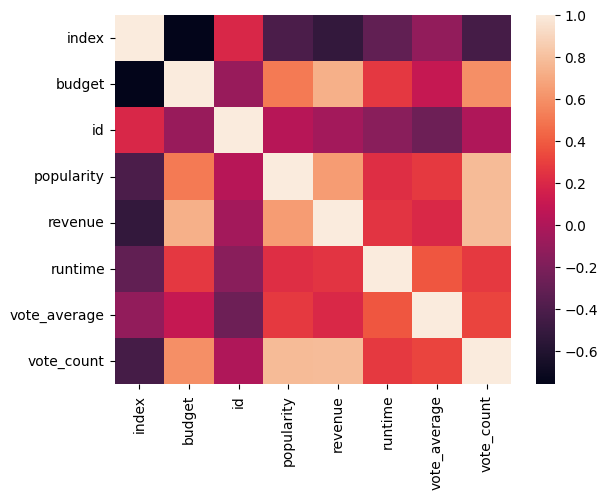

In [10]:
corr=movies_data.corr()
sns.heatmap(corr)

###### Shows that popularity and vote_count, revenue and vote_count , revenue and budget are highly correlated.

### Finding the Null Values

In [11]:
display (movies_data.isna().sum())

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [12]:
display (movies_data[selected_features].head())

,genres,keywords,tagline,cast,director
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Enter the World of Pandora.,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"At the end of the world, the adventure begins.",Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A Plan No One Escapes,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,The Legend Ends,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"Lost in our world, found in another.",Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


In [13]:
display (movies_data[selected_features].isna().sum())

genres       28
keywords    412
tagline     844
cast         43
director     30
dtype: int64

In [14]:
for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')
display (movies_data.head())

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [15]:
display (movies_data[selected_features].isna().sum())

genres      0
keywords    0
tagline     0
cast        0
director    0
dtype: int64

In [16]:

combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']
display (combined_features)


0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object

## Demographic Filtering
Demographic Recommender system generate recommendations based on the user demographic attributes. It categorize the users based on their attributes and recommends the movies by utilizing their demographic data.
They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. 
We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) which is given as :-

where,

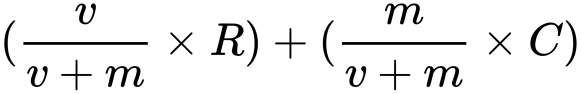

v is the number of votes for the movie;

m is the minimum votes required to be listed in the chart;

R is the average rating of the movie;

C is the mean vote across the whole report

In [17]:
C = movies_data['vote_average'].mean()
C

6.092171559442016

So, the mean rating for all the movies is approx 6 on a scale of 10.Now we will determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 90th percentile as our cutoff so that we can get top 10 best movies from the list.

In [18]:
m= movies_data['vote_count'].quantile(0.9)
m

1838.4000000000015

In [19]:
q_movies = movies_data.copy().loc[movies_data['vote_count'] >= m]
q_movies.shape

(481, 24)

Here we can see that the dataset has been filtered out based on the criteria we mentioned giving us 481 movies qualified

In [20]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [21]:
q_movies['score']

0       7.050669
1       6.665696
2       6.239396
3       7.346721
4       6.096368
          ...   
4291    6.693677
4300    7.366378
4302    7.210428
4337    7.198026
4602    7.210563
Name: score, Length: 481, dtype: float64

In [22]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(15)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

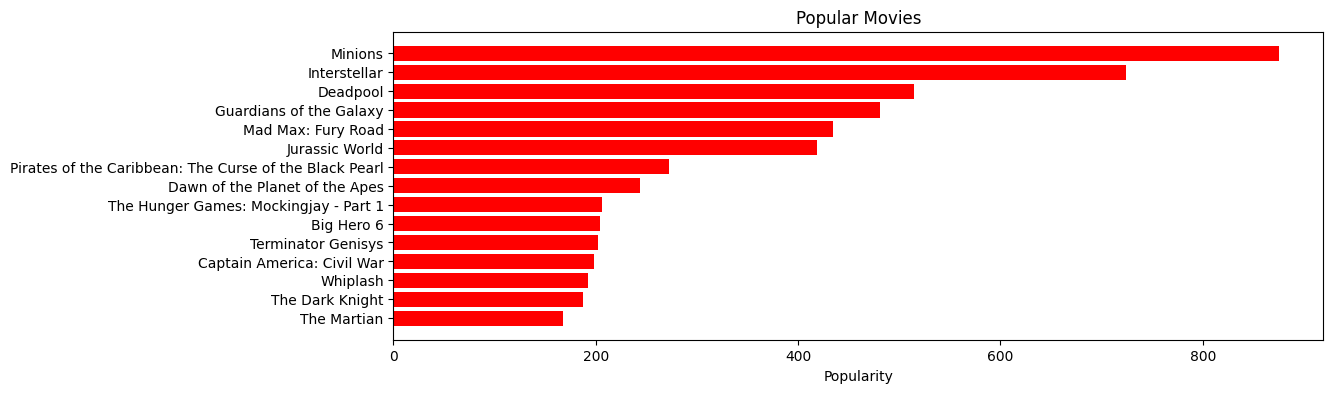

In [23]:
chart = movies_data.sort_values('popularity', ascending=False)

plt.figure(figsize=(12,4))

plt.barh(chart['title'].head(15),chart['popularity'].head(15), align='center',
        color='red')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

### Vectorization of Data
Vectorization is used to speed up the Python code without using loop. Using such a function can help in minimizing the running time of code efficiently. Various operations are being performed over vector such as dot product of vectors which is also known as scalar product as it produces single output, outer products which results in square matrix of dimension equal to length X length of the vectors, Element wise multiplication which products the element of same indexes and dimension of the matrix remain unchanged.

In [24]:
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
display (feature_vectors.shape)
print (feature_vectors)


(4803, 17318)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

###### TF is a measure of how often a phrase appears in a document, and IDF is about how important that phrase is

## Content Based Filtering using Cosine Similarity
A Content-Based Recommender works by the data that we take from the user, either explicitly (rating) or implicitly (clicking on a link). By the data we create a user profile, which is then used to suggest to the user, as the user provides more input or take more actions on the recommendation, the engine becomes more accurate.

Cosine similarity is a metric, helpful in determining, how similar the data objects are irrespective of their size. We can measure the similarity between two sentences in Python using Cosine Similarity. It can be used to compare documents or, say, give a ranking of documents with respect to a given vector of query words. Let x and y be two vectors for comparison. Using the cosine measure as a similarity function, we have

###### Cos(x, y) = x . y / ||x|| * ||y||
where,

x . y = product (dot) of the vectors ‘x’ and ‘y’.
||x|| and ||y|| = length of the two vectors ‘x’ and ‘y’.
||x|| * ||y|| = cross product of the two vectors ‘x’ and ‘y


In [25]:
similarity = cosine_similarity(feature_vectors)
print  (similarity )


[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [26]:
display(similarity.shape)

(4803, 4803)

In [27]:
#lists all the movie titles
list_of_all_titles = movies_data['title'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [28]:
movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : The Shawshank


In [29]:
len(list_of_all_titles)

4803

In [30]:
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)
#gives the closest match possible to the title given by users

['The Shallows', 'The Shawshank Redemption', 'The Shadow']


In [31]:
close_match = find_close_match[0]
print(close_match)


The Shallows


In [32]:
index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]
print(index_of_the_movie)


2742


In [33]:
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)
#finding the similarity score of the movie with the given movie by the user.

[(0, 0.007776688622457363), (1, 0.04192243152386986), (2, 0.0), (3, 0.016388616091388843), (4, 0.034190825275641656), (5, 0.008056040565405325), (6, 0.0), (7, 0.0), (8, 0.0), (9, 0.0), (10, 0.008746984360011634), (11, 0.00395382117125658), (12, 0.033243355704617505), (13, 0.00716907467014257), (14, 0.007726014627857982), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.02420367745495483), (19, 0.013487872626050102), (20, 0.007744412007626217), (21, 0.0), (22, 0.007023617213357593), (23, 0.013449119239173657), (24, 0.01698462752159325), (25, 0.006948122642312998), (26, 0.0), (27, 0.011138597949447361), (28, 0.04479061454609911), (29, 0.004656697836674406), (30, 0.017694118202441312), (31, 0.015285046100368503), (32, 0.016242728482704846), (33, 0.039334596835235665), (34, 0.0), (35, 0.008272429944029304), (36, 0.007454119534476934), (37, 0.04355675465502126), (38, 0.0), (39, 0.0073237983028549385), (40, 0.008239737791545071), (41, 0.09125670842427401), (42, 0.0), (43, 0.020333934368564545), (44, 

In [34]:
len(similarity_score)

4803

In [35]:
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)


[(2742, 1.0), (930, 0.1536812505944201), (982, 0.14737100190644886), (2120, 0.1337333517823953), (1195, 0.1314048909798749), (1407, 0.1276793250585694), (4589, 0.09887665681540593), (2125, 0.09772714031364574), (3680, 0.09366859094732592), (1075, 0.0934389078110411), (2064, 0.09265277974221214), (2891, 0.09257519218653942), (41, 0.09125670842427401), (4672, 0.08450559140923687), (1599, 0.08419742650006683), (1212, 0.08392987423013781), (1328, 0.08144615611831886), (1859, 0.07644145570707866), (2953, 0.07386780379081076), (2575, 0.07358469326224741), (542, 0.07311453908695925), (2094, 0.07197557500788607), (753, 0.0715366442201543), (1754, 0.07134604589307716), (3417, 0.07103460481294614), (4002, 0.07098154513591458), (4162, 0.07067959446599215), (318, 0.07062271434430538), (1917, 0.06950758745643712), (215, 0.06949936729915182), (2417, 0.06899304047307805), (1995, 0.06892215138605333), (4777, 0.06870678625142111), (1271, 0.06781549295607875), (3097, 0.06742141502160062), (4110, 0.06693

In [36]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<=30):
    print(i, '.',title_from_index)
    i+=1


 Enter your favourite movie name : The Shawshank
Movies suggested for you : 

1 . The Shallows
2 . Non-Stop
3 . Run All Night
4 . Orphan
5 . Unknown
6 . House of Wax
7 . Fabled
8 . The Grudge 2
9 . Lady in White
10 . Savages
11 . Underdogs
12 . The Life Before Her Eyes
13 . Green Lantern
14 . A Fistful of Dollars
15 . The Age of Adaline
16 . Medicine Man
17 . The Town
18 . The Sisterhood of the Traveling Pants
19 . Return to the Blue Lagoon
20 . The Hills Have Eyes 2
21 . Carriers
22 . Jaws 2
23 . The Sentinel
24 . The Sisterhood of the Traveling Pants 2
25 . Elite Squad
26 . Riding Giants
27 . Buried
28 . Surf's Up
29 . The 33
30 . Fantastic 4: Rise of the Silver Surfer


## Collaborative Filtering
In Collaborative Filtering, we tend to find similar users and recommend what similar users like. In this type of recommendation system, we don’t use the features of the item to recommend it, rather we classify the users into the clusters of similar types, and recommend each user according to the preference of its cluster.
To address some of the limitations of content-based filtering, collaborative filtering uses similarities between users and items simultaneously to provide recommendations.

To implement Collaborative filtering we will user another dataset with userid taken from Kaggle.

In [37]:
movie = pd.read_csv("movie_new.csv")
rating = pd.read_csv("rating.csv")
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [38]:
movie['year'] = movie.title.str.extract('(\\d\d\d\d\))',
expand=False)
#Removing the parentheses
movie['year'] = movie.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
movie['title'] = movie.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movie['title'] = movie['title'].apply(lambda x: x.strip())

C:\Users\User\AppData\Local\Temp\ipykernel_13548\1942290245.py:6: FutureWarning:

The default value of regex will change from True to False in a future version.



###### Collaborative filtering doesn't recommend based on the features of the movie. The recommendation is based on the likes and dislikes or ratings of the neighbours or other users. So we will drop the genre column, since there is no use of it.

In [39]:
movie.drop(columns=['genres'], inplace=True)

In [40]:
movie

,movieId,title,year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995
...,...,...,...
27273,131254,Kein Bund für's Leben,2007
27274,131256,"Feuer, Eis & Dosenbier",2002
27275,131258,The Pirates,2014
27276,131260,Rentun Ruusu,2001


The technique Collaborative Filtering, which is also known as User-User Filtering. As hinted by its alternate name, this technique uses other users to recommend items to the input user. It attempts to find users that have similar preferences and opinions as the input and then recommends items that they have liked to the input. There are several methods of finding similar users (Even some making use of Machine Learning), and the one we will be using here is going to be based on the Pearson Correlation Function.

1. Select a user with the movies the user has watched
2. Add movieIds to the movies watched by the user for easy recommendation
3. Based on his rating to movies, find the top X neighbours
4. Get the watched movie record of the user for each neighbour.
5. Calculate a similarity score using some formula
6. Recommend the items with the highest score

In [41]:
user = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':4.5},
            {'title':'Jumanji', 'rating':4},
            {'title':"Pulp Fiction", 'rating':4.5},
            {'title':'Akira', 'rating':5}
         ] 
inputMovie = pd.DataFrame(user)
inputMovie
#Filtering out the movies by title
Id = movie[movie['title'].isin(inputMovie['title'].tolist())]
#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovie = pd.merge(Id, inputMovie)

In [42]:
#Filtering out the movies by title
Id = movie[movie['title'].isin(inputMovie['title'].tolist())]
#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovie = pd.merge(Id, inputMovie)
#Dropping information we won't use from the input dataframe
inputMovie = inputMovie.drop('year', axis = 1)
inputMovie

,movieId,title,rating
0,1,Toy Story,4.5
1,2,Jumanji,4.0
2,296,Pulp Fiction,4.5
3,1274,Akira,5.0
4,1968,"Breakfast Club, The",5.0


###### Finding the users who have seen the same movies from the rating dataframe

In [43]:
#Filtering out users that have watched movies that the input has watched and storing it
users = rating[rating['movieId'].isin(inputMovie['movieId'].tolist())]

userSubsetGroup = users.groupby(['userId'])
#Sorting it so that users with movie ratings most in common with the input will have priority
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)

In [44]:
userSubsetGroup

[(91,
        userId  movieId  rating            timestamp
  9621      91        1     4.0  2005-03-22 22:46:02
  9622      91        2     3.5  2005-03-29 01:55:58
  9669      91      296     3.5  2005-03-23 03:45:02
  9826      91     1274     2.5  2005-03-27 23:38:23
  9903      91     1968     4.0  2005-07-18 08:02:11),
 (294,
         userId  movieId  rating            timestamp
  37452     294        1     4.5  2010-10-30 23:03:31
  37453     294        2     4.5  2010-10-30 23:04:12
  37504     294      296     4.5  2010-10-30 22:59:14
  37648     294     1274     4.5  2010-10-30 11:17:50
  37731     294     1968     5.0  2010-10-30 22:56:31),
 (586,
         userId  movieId  rating            timestamp
  81164     586        1     2.5  2005-03-22 07:29:16
  81165     586        2     3.0  2005-04-05 11:42:36
  81226     586      296     5.0  2005-03-22 06:43:47
  81390     586     1274     4.0  2007-10-14 05:10:13
  81499     586     1968     3.0  2005-03-22 07:20:35),
 (648,
 

###### Why Pearson Correlation?
Two users might rate two series of items totally different in terms of absolute rates, but they would be similar users (i.e. with similar ideas) with similar rates in various scales.

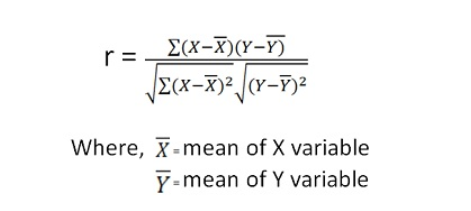

In [45]:
userSubsetGroup = userSubsetGroup[0:100]

In [46]:
from math import sqrt
pearsonCorDict = {}

for name, group in userSubsetGroup:
    group = group.sort_values(by='movieId')
    inputMovie = inputMovie.sort_values(by='movieId')
    n = len(group)
    temp = inputMovie[inputMovie['movieId'].isin(group['movieId'].tolist())]
    tempRatingList = temp['rating'].tolist()
    tempGroupList = group['rating'].tolist()
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(n)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(n)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(n)
    
    if Sxx != 0 and Syy != 0:
        pearsonCorDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorDict[name] = 0

In [47]:
pearsonCorDict.items()

dict_items([(91, -0.2439750182371328), (294, 0.5345224838248515), (586, 0.14940357616679892), (648, 0.3668996928526721), (775, 0.6370589892970306), (812, 0.5041841733655127), (869, -0.1889822365046132), (903, -0.4909902530309851), (1200, -0.03636964837266324), (1244, 0.46770717334673495), (1715, 0.7637626158259697), (1748, 0.4225771273642574), (1763, -0.21821789023599478), (1810, 0.4432026302139557), (1813, 0.5972048395251383), (1849, 0.600099198148974), (1864, 0.4225771273642574), (1942, 0.3668996928526721), (1984, -0.5168765907047378), (2047, 0.7901798760112795), (2099, -0.5345224838248515), (2367, 0.13363062095621375), (2397, 0), (2515, 0.763762615825975), (2661, 0.46770717334673495), (2757, 0.8964214570007935), (2959, 0.4285714285714228), (2988, 0.32322996757772765), (3179, 0.0), (3218, 0.763762615825975), (3268, 0.6428571428571443), (3269, 0.5271016357912232), (3318, 0.6071428571428522), (3397, 0.9063269671749689), (3487, 0.13363062095621708), (3576, 0.32732683535398976), (3629, 0

In [48]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

,similarityIndex,userId
0,-0.243975,91
1,0.534522,294
2,0.149404,586
3,0.366900,648
4,0.637059,775


In [49]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
topUsers.head()

,similarityIndex,userId
36,0.975900,3629
33,0.906327,3397
25,0.896421,2757
73,0.870864,8944
19,0.790180,2047


In [50]:
topUsersRating=topUsers.merge(rating, left_on='userId', right_on='userId', how='inner')
topUsersRating.head()

,similarityIndex,userId,movieId,rating,timestamp
0,0.9759,3629,1,4.5,2006-09-10 06:13:29
1,0.9759,3629,2,3.5,2006-09-17 05:10:02
2,0.9759,3629,10,4.0,2006-09-12 05:28:00
3,0.9759,3629,16,4.0,2006-09-11 05:53:17
4,0.9759,3629,17,4.5,2006-09-11 05:54:14


In [51]:
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

,similarityIndex,userId,movieId,rating,timestamp,weightedRating
0,0.9759,3629,1,4.5,2006-09-10 06:13:29,4.39155
1,0.9759,3629,2,3.5,2006-09-17 05:10:02,3.41565
2,0.9759,3629,10,4.0,2006-09-12 05:28:00,3.90360
3,0.9759,3629,16,4.0,2006-09-11 05:53:17,3.90360
4,0.9759,3629,17,4.5,2006-09-11 05:54:14,4.39155


multiply the movie rating by its weight (The similarity index), then sum up the new ratings and divide it by the sum of the weights.

We can easily do this by simply multiplying two columns, then grouping up the dataframe by movieId and then dividing two columns:

In [52]:
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
movieId,,
1,30.218744,113.627852
2,30.218744,80.701966
3,10.134683,24.452809
4,2.316134,6.046978
5,7.642919,18.800993


In [53]:
#Creates an empty dataframe
recommendation_df = pd.DataFrame()
#Now we take the weighted average
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index
recommendation_df.head()

,weighted average recommendation score,movieId
movieId,,
1,3.760178,1
2,2.670593,2
3,2.412785,3
4,2.610807,4
5,2.459923,5


In [54]:
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head(10)

,weighted average recommendation score,movieId
movieId,,
5632,5.0,5632
3606,5.0,3606
26158,5.0,26158
25952,5.0,25952
25954,5.0,25954
25963,5.0,25963
26003,5.0,26003
4921,5.0,4921
26163,5.0,26163


In [55]:
movie.loc[movie['movieId'].isin(recommendation_df.head(10)['movieId'].tolist())]

,movieId,title,year
3515,3606,On the Town,1949
4177,4272,Tuvalu,1999
4825,4921,Little Women,1933
5533,5632,Bloody Sunday,2002
8509,25952,"Letter to Three Wives, A",1949
8510,25954,Orpheus (Orphée),1950
8517,25963,"Young and the Damned, The (Olvidados, Los)",1950
8545,26003,Night and Fog (Nuit et brouillard),1955
8651,26158,Closely Watched Trains (Ostre sledované vlaky),1966
8655,26163,Don't Look Back,1967
